CIFAR 100 CNN By: Joseph Ho

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar100
from keras.optimizers import Adam


Load Training Data

In [ ]:
# Constants
batch_size = 64
num_classes = 100
epochs = 100  # Increase epochs for better learning
img_rows, img_cols, img_depth = 32, 32, 3

# Load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
input_shape = (img_rows,img_cols,img_depth)

# Print original shapes
print("X_train original shape", x_train.shape)
print("Y_train original shape", y_train.shape)


169001437/169001437 [==============================] - 13s 0us/step
X_train original shape (50000, 32, 32, 3)
Y_train original shape (50000, 1)


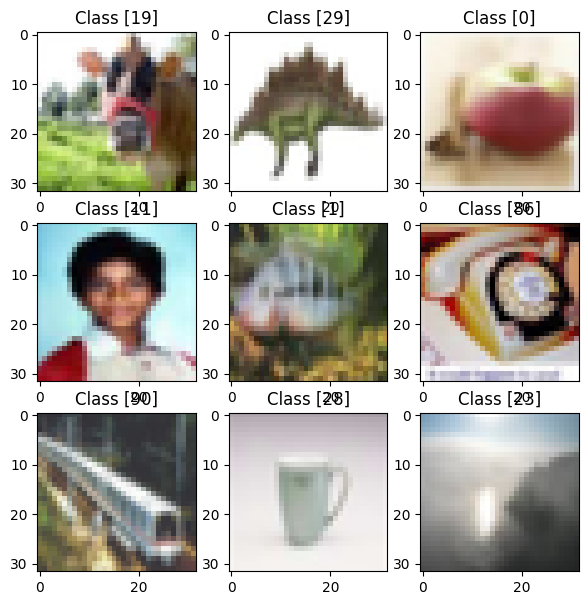

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Data augmentation for training data only
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for test/validation data, only rescaling
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:

# Initialize the model
model = Sequential()

# Convolutional layers with Batch Normalization

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, img_depth)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))  # Reduced dropout rate

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Reduced dropout rate

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))  # Reduced dropout rate

# Flatten the output before feeding it into the dense layers
model.add(Flatten())

# Fully connected layers with Dropout
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))  # Reduced dropout rate
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#Compile
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training data generator with augmentation
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

# Validation data generator without augmentation
validation_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)

# Callbacks for learning rate adjustment and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=x_train.shape[0] // batch_size,
    validation_data=validation_generator,
    validation_steps=x_test.shape[0] // batch_size,
    epochs=epochs,
    callbacks=[reduce_lr, early_stop]
)



Epoch 1/100
781/781 [==============================] - 40s 36ms/step - loss: 3.9801 - accuracy: 0.0989 - val_loss: 3.6090 - val_accuracy: 0.1444 - lr: 0.0010
Epoch 2/100
781/781 [==============================] - 27s 34ms/step - loss: 3.1921 - accuracy: 0.2150 - val_loss: 3.0376 - val_accuracy: 0.2507 - lr: 0.0010
Epoch 3/100
781/781 [==============================] - 27s 34ms/step - loss: 2.7525 - accuracy: 0.2945 - val_loss: 2.4603 - val_accuracy: 0.3575 - lr: 0.0010
Epoch 4/100
781/781 [==============================] - 27s 34ms/step - loss: 2.4868 - accuracy: 0.3500 - val_loss: 2.3488 - val_accuracy: 0.3849 - lr: 0.0010
Epoch 5/100
781/781 [==============================] - 26s 34ms/step - loss: 2.3089 - accuracy: 0.3880 - val_loss: 2.3944 - val_accuracy: 0.3791 - lr: 0.0010
Epoch 6/100
781/781 [==============================] - 27s 34ms/step - loss: 2.1848 - accuracy: 0.4136 - val_loss: 2.0628 - val_accuracy: 0.4449 - lr: 0.0010
Epoch 7/100
781/781 [==============================]

Training loss: 0.6589261889457703
Training accuracy: 0.8027200102806091
Test loss: 1.2133790254592896
Test accuracy: 0.6568999886512756


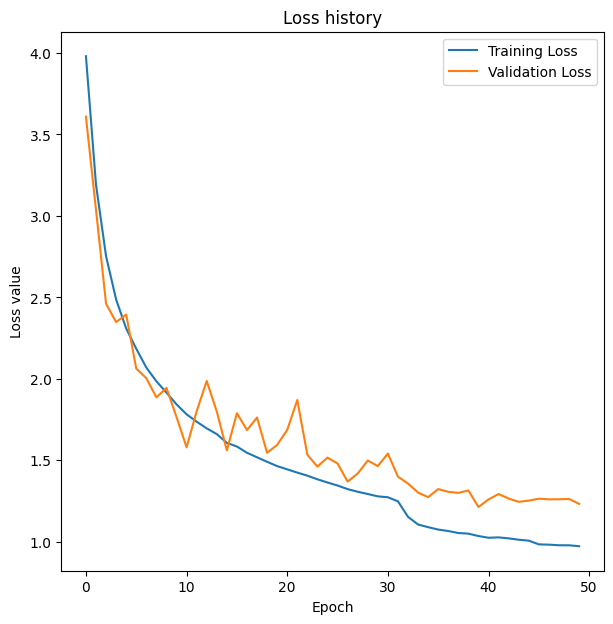

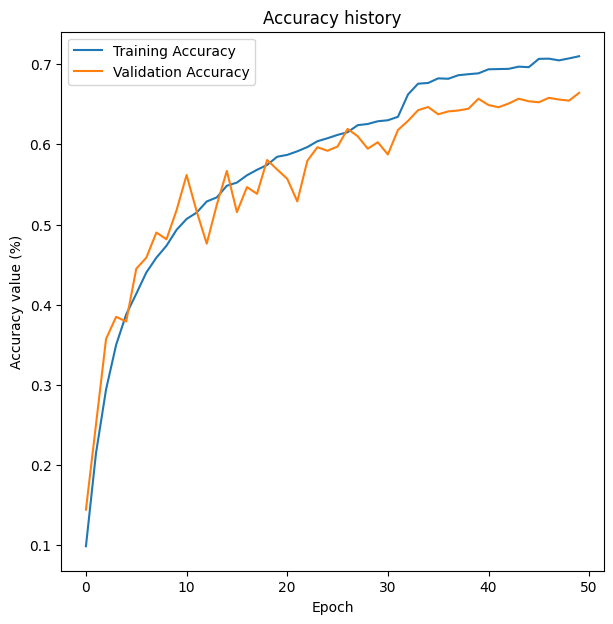

In [ ]:
# Evaluate the model
train_score = model.evaluate((train_generator), verbose=0)
print('Training loss:', train_score[0])
print('Training accuracy:', train_score[1])
# Evaluate the model
test_score = model.evaluate((validation_generator), verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

# Plot history: Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss history')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Plot history: Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

313/313 [==============================] - 1s 2ms/step


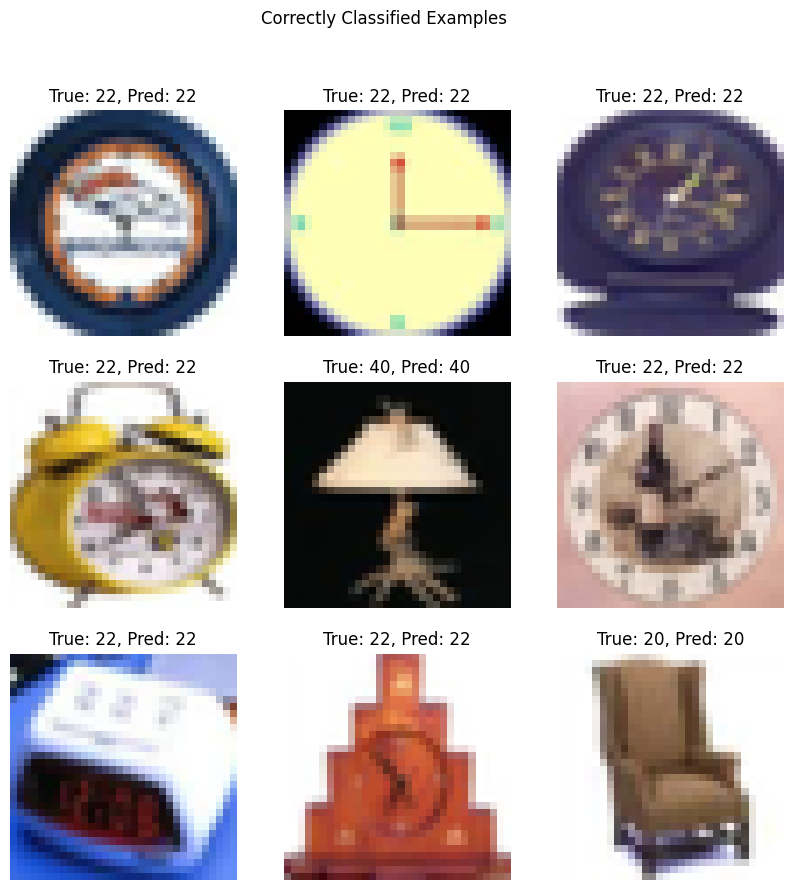

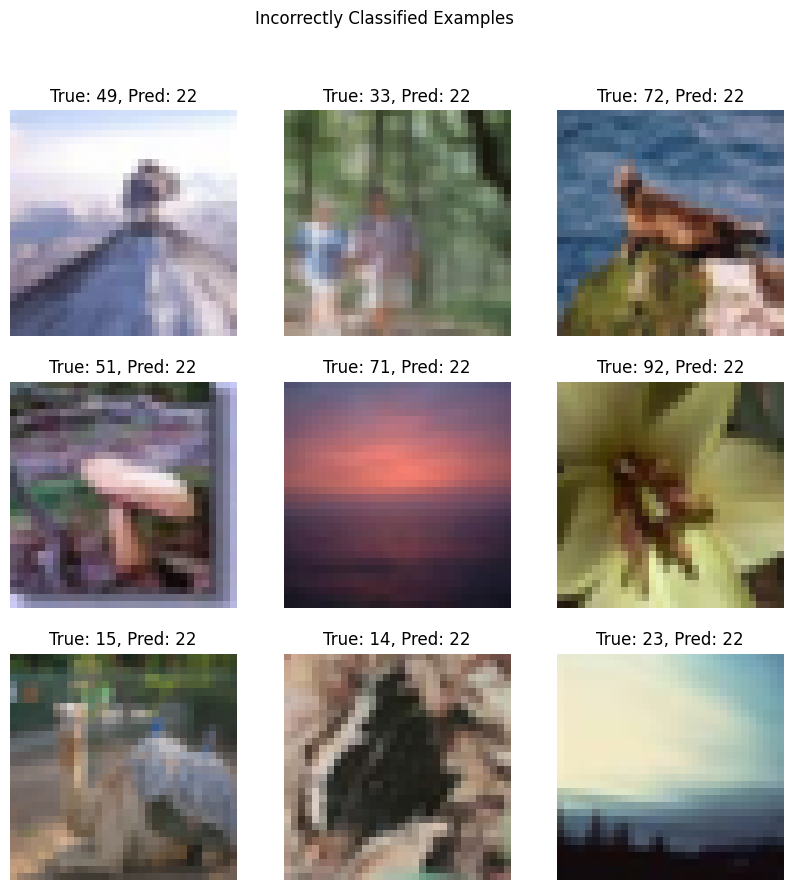

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test data
predictions = model.predict(x_test)

# Convert predictions and true labels from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Identify correct and incorrect classifications
correct_indices = np.nonzero(predicted_classes == true_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

# Display example of correctly classified images
def display_examples(indices, title):
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices[:9]):  # Displaying first 9 examples
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_test[idx].reshape(img_rows, img_cols, img_depth))
        plt.title(f"True: {true_classes[idx]}, Pred: {predicted_classes[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display examples of correct classifications
display_examples(correct_indices, "Correctly Classified Examples")

# Display examples of incorrect classifications
display_examples(incorrect_indices, "Incorrectly Classified Examples")
